## Visualize the census bureau databset(Adult data sets)by plotting the following graphs using Python. (Define objective for every graph)
### a. Histograms
### b. Dot Plots
### c. Bar Plots
### d. Line Charts
### e. Add Histogram and Scatter plot to box plot. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Adult dataset without header
df = pd.read_csv('adult.csv', header=None)

In [4]:
# Manually assign column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df.columns = column_names

# Check
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df.shape

(48843, 15)

## HISTOGRAM
### Objective: To understand the distribution of individual numerical features like age, chol (cholesterol), thalach (max heart rate).

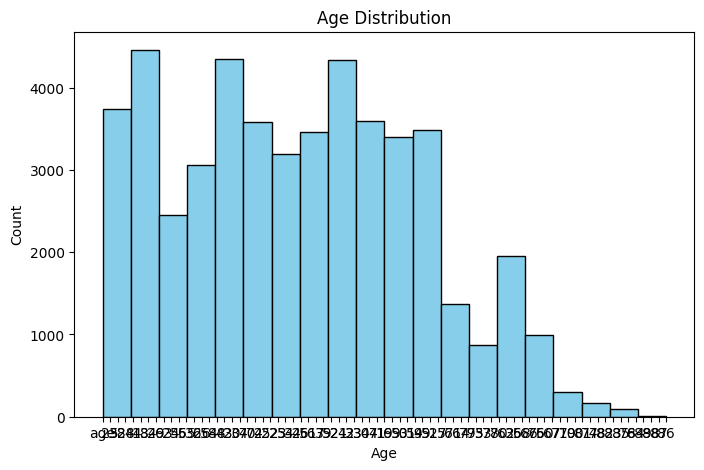

In [18]:
plt.figure(figsize=(8, 5))
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(False)
plt.show()

## DOT PLOTS
### Objective: To visualize the frequency of categorical features like cp (chest pain type) or sex.

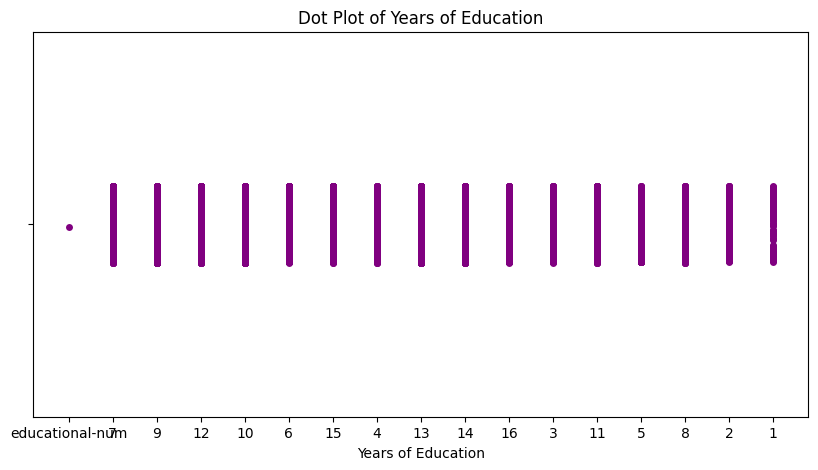

In [11]:
# Dot plot for education_num
plt.figure(figsize=(10,5))
sns.stripplot(x='education_num', data=df, color='purple', jitter=True)
plt.title('Dot Plot of Years of Education')
plt.xlabel('Years of Education')
plt.show()

## BAR PLOTS
### Objective: To compare the mean cholesterol levels across different types of chest pain (cp) or across gender (sex).

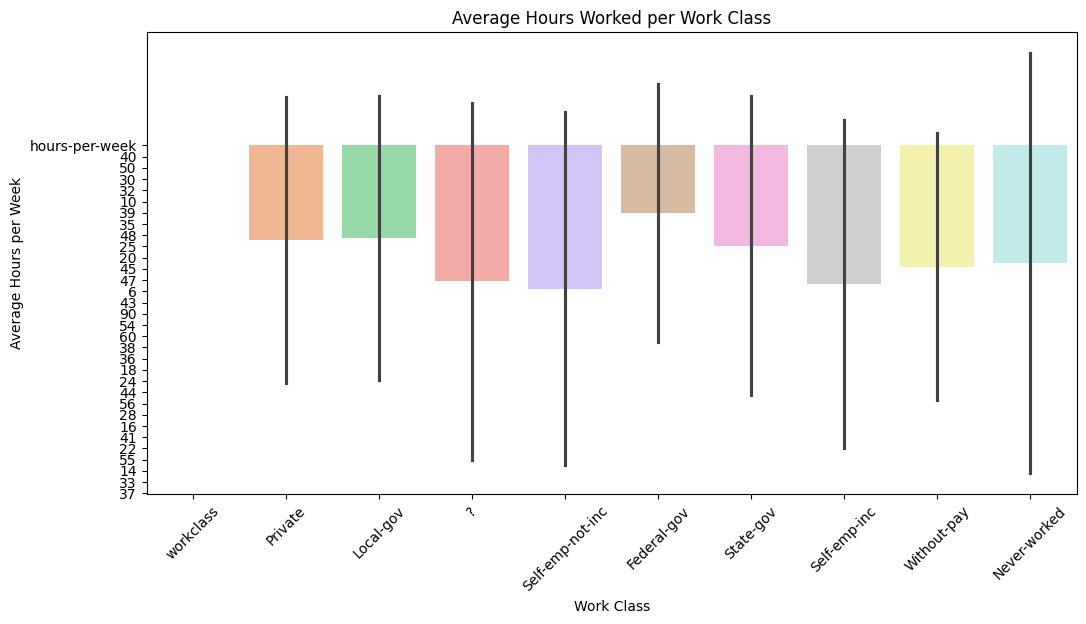

In [13]:
# Bar plot for average working hours per workclass
plt.figure(figsize=(12,6))
sns.barplot(x='workclass', y='hours_per_week', hue='workclass', data=df, estimator='mean', errorbar='sd', palette='pastel')
plt.title('Average Hours Worked per Work Class')
plt.xticks(rotation=45)
plt.xlabel('Work Class')
plt.ylabel('Average Hours per Week')
plt.show()

## LINE CHARTS
### Objective: To observe trend patterns, for example how maximum heart rate (thalach) varies with age.

In [14]:
# Line chart of average working hours vs age
avg_hours_by_age = df.groupby('age')['hours_per_week'].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_hours_by_age.index, avg_hours_by_age.values, marker='o', color='green')
plt.title('Average Working Hours by Age')
plt.xlabel('Age')
plt.ylabel('Average Hours per Week')
plt.grid(True)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

## Add Histogram and Scatter plot to box plot. 
### Objective: To show detailed distribution (histogram and scatter) along with outliers (box plot) for variables like age or chol.

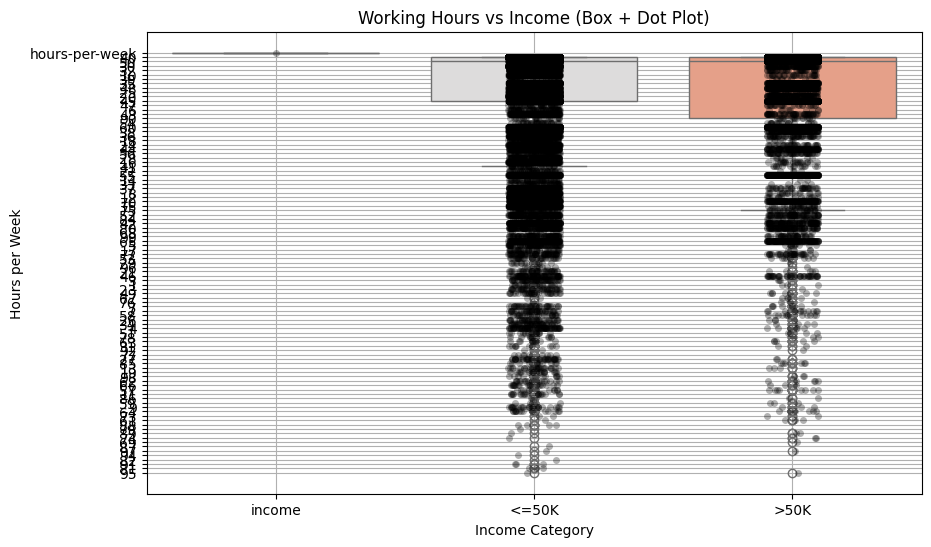

In [17]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='income', y='hours_per_week', hue='income', data=df, palette='coolwarm')

# Scatter (dot) overlay
sns.stripplot(x='income', y='hours_per_week', data=df, color='black', alpha=0.3, jitter=True)

plt.title("Working Hours vs Income (Box + Dot Plot)")
plt.xlabel("Income Category")
plt.ylabel("Hours per Week")
plt.grid(True)
plt.show()